In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('approved_projects_with_demographics.csv')
df = df[['permitnumber', 'worktype', 'permittypedescr', 'declared_valuation', 'occupancytype']]
df.head()

,permitnumber,worktype,permittypedescr,declared_valuation,occupancytype
0,A1048,ERECT,Amendment to a Long Form,0.0,Mixed
1,A21302,NEWCON,Amendment to a Long Form,15000.0,Mixed
2,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed
3,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed
4,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed


In [10]:
worktypes_df = pd.DataFrame(columns = ['worktype', 'count'])

worktypes = df['worktype'].unique()

work_groups = df.groupby(df.worktype)

for i in range(len(worktypes)):
    temp_df = work_groups.get_group(worktypes[i])
    worktypes_df.loc[i] = [worktypes[i], len(temp_df)]

worktypes_df.loc[9] = ['UNLABELED', 19]
worktypes_df

,worktype,count
0,ERECT,1584
1,NEWCON,583
2,Capital,1330
3,Service,2511
4,Main,2859
5,PVTEMER,223
6,INTEXT,1
7,EXTREN,2
8,GARAGE,3
9,UNLABELED,19


Text(0, 0.5, 'Count')

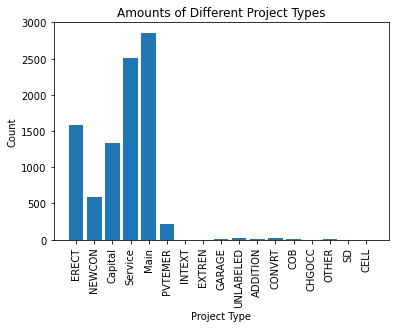

In [11]:
plt.bar(worktypes_df['worktype'], worktypes_df['count'])
plt.xticks(rotation=90)
plt.title('Amounts of Different Project Types')
plt.xlabel('Project Type')
plt.ylabel('Count')

In [12]:
permit_type_df = pd.DataFrame(columns = ['permittype', 'count'])

permittypes = df['permittypedescr'].unique()

types_groups = df.groupby(df.permittypedescr)

for i in range(len(permittypes)):
    temp_df = types_groups.get_group(permittypes[i])
    permit_type_df.loc[i] = [permittypes[i], len(temp_df)]

permit_type_df

,permittype,count
0,Amendment to a Long Form,48
1,Certificate of Occupancy,782
2,Erect/New Construction,970
3,Excavation Permit,6938
4,Electrical Permit,91
5,Plumbing Permit,42
6,Short Form Bldg Permit,152
7,Long Form/Alteration Permit,72
8,Foundation Permit,29
9,Gas Permit,17


Text(0, 0.5, 'Count')

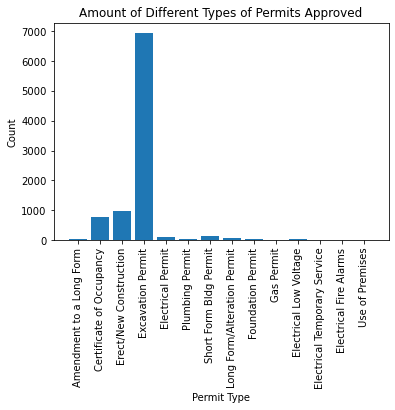

In [14]:
plt.bar(permit_type_df['permittype'], permit_type_df['count'])
plt.xticks(rotation=90)
plt.title('Amount of Different Types of Permits Approved')
plt.xlabel('Permit Type')
plt.ylabel('Count')

In [16]:
occupancy_type_df = pd.DataFrame(columns = ['occupancytype', 'count'])

occupancytypes = df['occupancytype'].unique()

types_groups = df.groupby(df.occupancytype)

for i in range(len(occupancytypes)):
    temp_df = types_groups.get_group(occupancytypes[i])
    occupancy_type_df.loc[i] = [occupancytypes[i], len(temp_df)]

occupancy_type_df.loc[1] = ['Unlabeled', 6970]
occupancy_type_df

,occupancytype,count
0,Mixed,198
1,Unlabeled,6970
2,Comm,270
3,Multi,404
4,1-2FAM,679
5,VacLd,201
6,1-3FAM,243
7,7More,7
8,Other,79
9,2unit,9


Text(0, 0.5, 'Count')

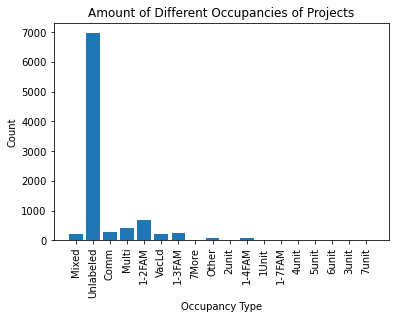

In [17]:
plt.bar(occupancy_type_df['occupancytype'], occupancy_type_df['count'])
plt.xticks(rotation=90)
plt.title('Amount of Different Occupancies of Projects')
plt.xlabel('Occupancy Type')
plt.ylabel('Count')

In [27]:
valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(30000)
df['above 30,000'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df) - sum(df['above 30,000'])]

valuation_df

,declared_valuation,count
0,"Above $30,000",1468
1,"Less than or equal to $30,000",7701


Text(0, 0.5, 'Count')

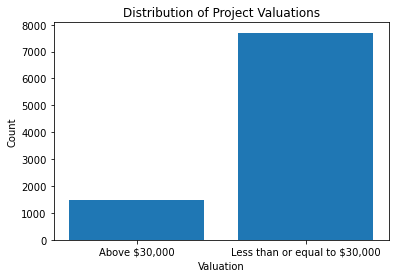

In [28]:
plt.bar(valuation_df['declared_valuation'], valuation_df['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [41]:
valuation_df2 = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(0)
df['above 0'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df2.loc[0] = ['Above $0', sum(df['above 0'])]
valuation_df2.loc[1] = ['Equal to $0', len(df) - sum(df['above 0'])]

valuation_df2

,declared_valuation,count
0,Above $0,1774
1,Equal to $0,7395


Text(0, 0.5, 'Count')

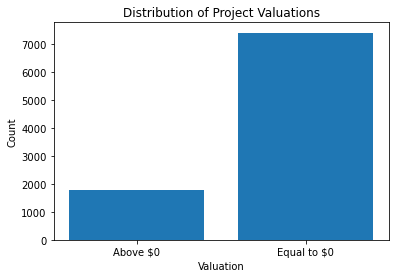

In [42]:
plt.bar(valuation_df2['declared_valuation'], valuation_df2['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [43]:
filt = df['above 0'] == 1
df2 = df[filt]

valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df2['declared_valuation'].gt(30000)
df2['above 30,000'] = (m.groupby(df2['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df2['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df2) - sum(df2['above 30,000'])]

valuation_df

<ipython-input-43-56eeea366270>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['above 30,000'] = (m.groupby(df2['permitnumber']).transform('sum').eq(1) & m).astype(int)


,declared_valuation,count
0,"Above $30,000",1468
1,"Less than or equal to $30,000",306


Text(0, 0.5, 'Count')

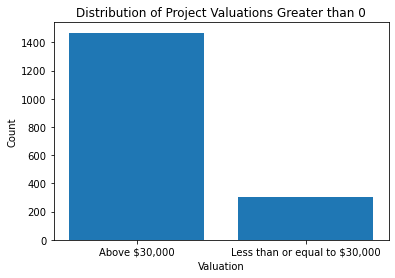

In [44]:
plt.bar(valuation_df['declared_valuation'], valuation_df['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations Greater than 0')
plt.xlabel('Valuation')
plt.ylabel('Count')